<a href="https://colab.research.google.com/github/Saisha0512/Portfolio_Optimization_ML_DL/blob/main/Saisha_PYML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio Optimization usin ML & DL**

#**Problem Statement**

#**Importing the Libraries**

In [ ]:
# Installing yfinance
!pip install yfinance

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#**Data Collection**

In [ ]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
start_date = '2012-01-03'
end_date = '2021-12-31'

df = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

all_data = []
for ticker in tickers:
    temp_df = df[ticker].copy()
    temp_df['Company'] = ticker
    temp_df.reset_index(inplace=True)
    all_data.append(temp_df)

stock_data = pd.concat(all_data)

# Column order per paper
stock_data = stock_data[['Date', 'Company', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Ensure correct types and ordering
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(subset=['Open','High','Low','Close','Volume'], inplace=True)
stock_data.sort_values(["Company", "Date"], inplace=True)
stock_data.reset_index(drop=True, inplace=True)

# Save raw data (unscaled)
stock_data.to_csv("stocks_data.csv", index=False)


[*********************100%***********************]  4 of 4 completed


In [ ]:
stock_data

Price,Date,Company,Open,High,Low,Close,Volume
0,2012-01-03,AAPL,12.290238,12.383300,12.278229,12.345174,302220800
1,2012-01-04,AAPL,12.308244,12.448739,12.286630,12.411513,260022000
2,2012-01-05,AAPL,12.456848,12.564920,12.388401,12.549310,271269600
3,2012-01-06,AAPL,12.601547,12.691007,12.585036,12.680500,318292800
4,2012-01-09,AAPL,12.773559,12.841103,12.648974,12.660382,394024400
...,...,...,...,...,...,...,...
10059,2021-12-23,MSFT,323.096110,326.630519,323.076701,324.979828,19617800
10060,2021-12-27,MSFT,325.727396,332.543746,325.698268,332.514618,19947000
10061,2021-12-28,MSFT,333.194358,333.835213,330.446476,331.349487,15661500
10062,2021-12-29,MSFT,331.398009,334.310972,329.825014,332.029175,15042000


In [ ]:
# Displaying AAPL data
stock_data[stock_data['Company'] == 'AAPL']

Price,Date,Company,Open,High,Low,Close,Volume
0,2012-01-03,AAPL,12.290238,12.383300,12.278229,12.345174,302220800
1,2012-01-04,AAPL,12.308244,12.448739,12.286630,12.411513,260022000
2,2012-01-05,AAPL,12.456848,12.564920,12.388401,12.549310,271269600
3,2012-01-06,AAPL,12.601547,12.691007,12.585036,12.680500,318292800
4,2012-01-09,AAPL,12.773559,12.841103,12.648974,12.660382,394024400
...,...,...,...,...,...,...,...
2511,2021-12-23,AAPL,172.403843,173.384246,171.835207,172.825409,68356600
2512,2021-12-27,AAPL,173.619540,176.884284,173.599943,176.796051,74919600
2513,2021-12-28,AAPL,176.629389,177.776459,175.031327,175.776428,79144300
2514,2021-12-29,AAPL,175.815616,177.090143,174.648935,175.864639,62348900


In [ ]:
# Displaying MSFT data
stock_data[stock_data['Company'] == 'MSFT']

Price,Date,Company,Open,High,Low,Close,Volume
7548,2012-01-03,MSFT,20.866301,21.188530,20.740553,21.039206,64731500
7549,2012-01-04,MSFT,21.078504,21.589354,21.047067,21.534340,80516100
7550,2012-01-05,MSFT,21.518626,21.793700,21.447894,21.754404,56081400
7551,2012-01-06,MSFT,21.636510,22.155220,21.636510,22.092346,99455500
7552,2012-01-09,MSFT,22.045186,22.084483,21.785831,21.801550,59706800
...,...,...,...,...,...,...,...
10059,2021-12-23,MSFT,323.096110,326.630519,323.076701,324.979828,19617800
10060,2021-12-27,MSFT,325.727396,332.543746,325.698268,332.514618,19947000
10061,2021-12-28,MSFT,333.194358,333.835213,330.446476,331.349487,15661500
10062,2021-12-29,MSFT,331.398009,334.310972,329.825014,332.029175,15042000


In [ ]:
# Displaying AMZN data
stock_data[stock_data['Company'] == 'AMZN']

Price,Date,Company,Open,High,Low,Close,Volume
2516,2012-01-03,AMZN,8.794500,8.974000,8.777500,8.951500,102216000
2517,2012-01-04,AMZN,8.960500,9.025000,8.803500,8.875500,84104000
2518,2012-01-05,AMZN,8.797000,8.912500,8.702500,8.880500,76182000
2519,2012-01-06,AMZN,8.903500,9.232500,8.875000,9.130500,140168000
2520,2012-01-09,AMZN,9.138000,9.218500,8.850000,8.928000,101138000
...,...,...,...,...,...,...,...
5027,2021-12-23,AMZN,170.427994,171.975006,170.149994,171.068497,36788000
5028,2021-12-27,AMZN,171.037003,172.942993,169.215500,169.669495,58688000
5029,2021-12-28,AMZN,170.182495,172.175995,169.135498,170.660995,54638000
5030,2021-12-29,AMZN,170.839996,171.212006,168.600494,169.201004,35754000


In [ ]:
# Displaying GOOGL data
stock_data[stock_data['Company'] == 'GOOGL']

Price,Date,Company,Open,High,Low,Close,Volume
5032,2012-01-03,GOOGL,16.242430,16.620792,16.228252,16.552631,146912940
5033,2012-01-04,GOOGL,16.543177,16.673031,16.433476,16.624025,114445440
5034,2012-01-05,GOOGL,16.471037,16.516808,16.324269,16.393423,131184684
5035,2012-01-06,GOOGL,16.396908,16.418053,16.164070,16.169792,107608284
5036,2012-01-09,GOOGL,16.082228,16.094666,15.453616,15.484213,232671096
...,...,...,...,...,...,...,...
7543,2021-12-23,GOOGL,145.626629,147.359734,145.578911,146.040649,26384000
7544,2021-12-27,GOOGL,146.378115,147.459626,146.292129,147.024734,15976000
7545,2021-12-28,GOOGL,147.352292,147.414920,145.183809,145.812531,18200000
7546,2021-12-29,GOOGL,145.770265,146.538167,144.779215,145.780701,17788000


#**Data Visualization**

['AAPL' 'AMZN' 'GOOGL' 'MSFT']


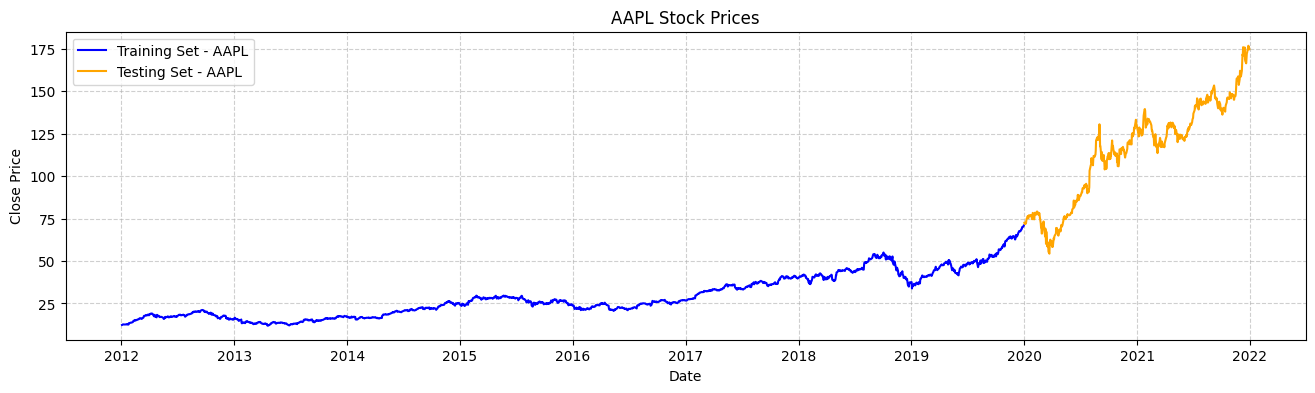

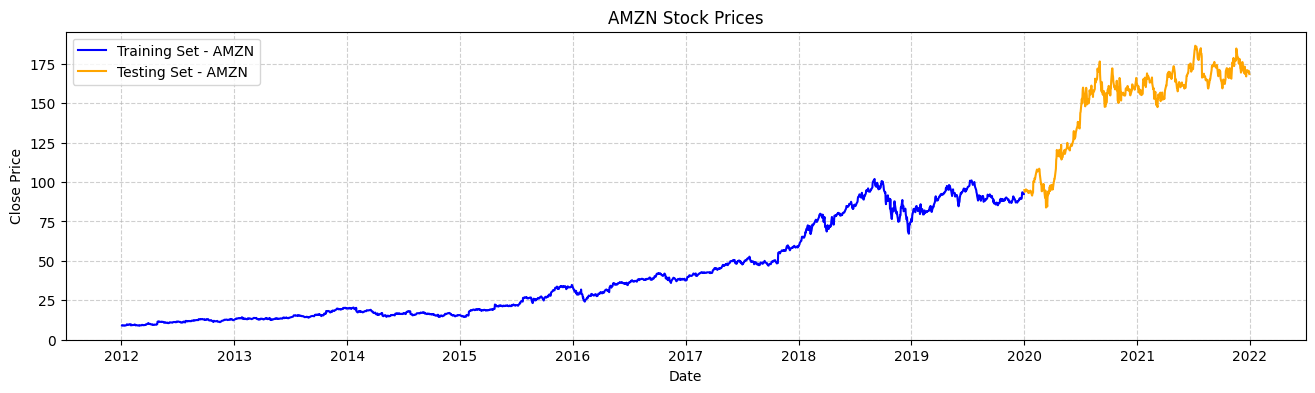

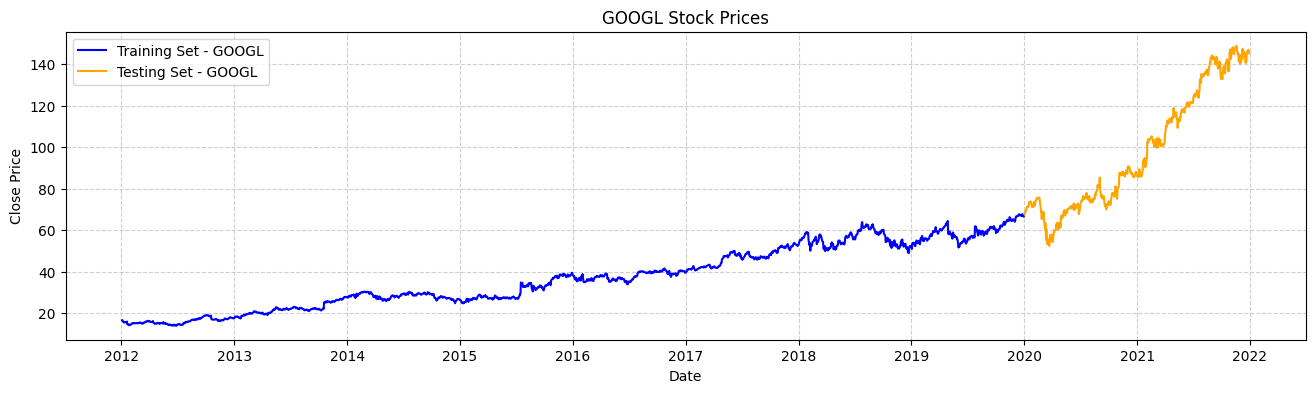

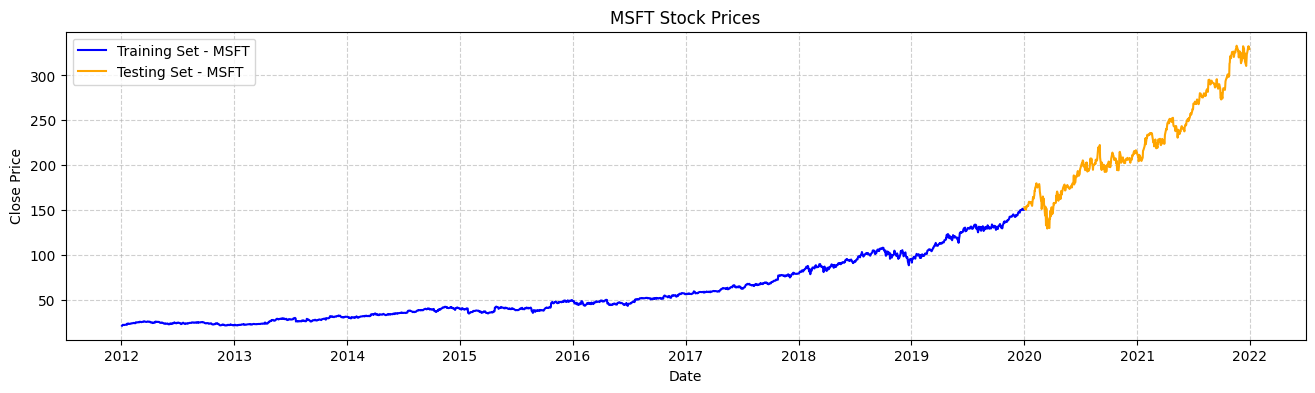

In [ ]:
# Assigning the list of companies to a variable
companies = stock_data['Company'].unique()
print(companies)

for company in companies:
    company_data = stock_data[stock_data['Company'] == company].sort_values(by="Date")

    plt.figure(figsize=(16,4))

    # Plot training set (first 80%)
    train_end = int(0.8 * len(company_data))
    plt.plot(company_data['Date'].iloc[:train_end],
             company_data['Close'].iloc[:train_end],
             label=f'Training Set - {company}', color='blue')

    # Plot testing set (last 20%)
    plt.plot(company_data['Date'].iloc[train_end:],
             company_data['Close'].iloc[train_end:],
             label=f'Testing Set - {company}', color='orange')

    plt.title(f'{company} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#**Data Preprocessing**

Applying Feature Scaling to the data

In [ ]:
'''
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import os
import joblib

scalers_dict = {}        # To store scalers for each company
scaled_features_list = []
scaled_target_list = []

for company in companies:
    print(f"🔄 Scaling data for {company}...")

    # Extract company-specific data
    company_df = stock_data[stock_data['Company'] == company].sort_values('Date')

    # Features and target
    features_company = company_df[['Open', 'High', 'Low', 'Volume']].values
    target_company = company_df[['Close']].values

    # ✅ Feature scaling pipeline
    preprocessing_pipeline = Pipeline([
        ('scaler', MinMaxScaler(feature_range=(0, 1)))
    ])
    features_scaled = preprocessing_pipeline.fit_transform(features_company)

    # ✅ Target scaling
    target_scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = target_scaler.fit_transform(target_company)

    # Save scaled data in DataFrame form (keeping Date & Company for tracking)
    features_scaled_df = pd.DataFrame(
        features_scaled,
        columns=['Open', 'High', 'Low', 'Volume']
    )
    features_scaled_df['Date'] = company_df['Date'].values
    features_scaled_df['Company'] = company

    target_scaled_df = pd.DataFrame(
        target_scaled,
        columns=['Close']
    )
    target_scaled_df['Date'] = company_df['Date'].values
    target_scaled_df['Company'] = company

    scaled_features_list.append(features_scaled_df)
    scaled_target_list.append(target_scaled_df)

    # Store scalers for later inverse-transforming predictions
    scalers_dict[company] = {
        'feature_scaler': preprocessing_pipeline.named_steps['scaler'],
        'target_scaler': target_scaler
    }

    # Save scalers for forecasting step
    os.makedirs("models", exist_ok=True)  # ensure models folder exists
    joblib.dump(preprocessing_pipeline.named_steps['scaler'], f"models/{company}_feature_scaler.pkl")
    joblib.dump(target_scaler, f"models/{company}_target_scaler.pkl")

# Combine all companies' scaled data
scaled_features_df = pd.concat(scaled_features_list, ignore_index=True)
scaled_target_df = pd.concat(scaled_target_list, ignore_index=True)

print("✅ Feature scaling completed for all companies.")
'''

'\nimport pandas as pd\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import MinMaxScaler\nimport os\nimport joblib\n\nscalers_dict = {}        # To store scalers for each company\nscaled_features_list = []\nscaled_target_list = []\n\nfor company in companies:\n    print(f"🔄 Scaling data for {company}...")\n\n    # Extract company-specific data\n    company_df = stock_data[stock_data[\'Company\'] == company].sort_values(\'Date\')\n\n    # Features and target\n    features_company = company_df[[\'Open\', \'High\', \'Low\', \'Volume\']].values\n    target_company = company_df[[\'Close\']].values\n\n    # ✅ Feature scaling pipeline\n    preprocessing_pipeline = Pipeline([\n        (\'scaler\', MinMaxScaler(feature_range=(0, 1)))\n    ])\n    features_scaled = preprocessing_pipeline.fit_transform(features_company)\n\n    # ✅ Target scaling\n    target_scaler = MinMaxScaler(feature_range=(0, 1))\n    target_scaled = target_scaler.fit_transform(target_company)\n\n    # Sa

What this does:
Loops through each company so scaling is done independently (important for LSTM).

Uses MinMaxScaler to transform values to the range [0, 1].

Keeps track of each company’s scalers in a dictionary for inverse transformation after predictions.

Outputs two datasets:

Scaled_Features.csv → Open, High, Low, Volume (scaled)

Scaled_Target.csv → Close (scaled)

In [ ]:
#scaled_features_df.sample(10)

In [ ]:
#scaled_target_df.sample(10)

#**Deep Learning**

Applying LSTM Model

In [ ]:
import numpy as np
import pandas as pd
import os
import joblib
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l1_l2

# ----------------------
# Config (paper-aligned)
# ----------------------
TIME_STEPS = 60
BATCH_SIZE = 64
EPOCHS = 150
LR_INIT = 0.0005
DROPOUT = 0.3
L1_REG, L2_REG = 1e-5, 1e-4

os.makedirs("models", exist_ok=True)
os.makedirs("history", exist_ok=True)
os.makedirs("architecture", exist_ok=True)
os.makedirs("metrics", exist_ok=True)
os.makedirs("scalers", exist_ok=True)


metrics_summary = {
    'Company': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'MAPE': []
}

# ----------------------
# Helper functions
# ----------------------
def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

def lr_scheduler(epoch, lr):
    return lr * 0.90  # paper-style gradual decay

def jitter(data, noise_factor=0.02):
    noise = np.random.normal(loc=0, scale=noise_factor, size=data.shape)
    return data + noise

# ----------------------
# Train per company
# ----------------------
companies = stock_data['Company'].unique()
for company in companies:
    print(f"\n🚀 Training LSTM for {company}...")

    # Extract raw values
    company_df = stock_data[stock_data['Company'] == company].sort_values('Date')
    X_raw = company_df[['Open', 'High', 'Low', 'Volume']].values.astype(float)
    y_raw = company_df[['Close']].values.astype(float)

    # ----------------------
    # Scaling (fit on full 2012–2021 because no future leakage)
    # ----------------------
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X_raw)
    y_scaled = target_scaler.fit_transform(y_raw)

    # Save scalers
    joblib.dump(feature_scaler, f"scalers/{company}_feature_scaler.pkl")
    joblib.dump(target_scaler, f"scalers/{company}_target_scaler.pkl")

    # ----------------------
    # Data augmentation (jitter)
    # ----------------------
    X_scaled = jitter(X_scaled, noise_factor=0.01)
    X_scaled = feature_scaler.transform(X_scaled)

    # ----------------------
    # Sequence creation
    # ----------------------
    X_seq, y_seq = create_sequences(X_scaled, y_scaled)

    # Chronological split (80% train, 20% test)
    split_idx = int(len(X_seq) * 0.8)
    X_train, y_train = X_seq[:split_idx], y_seq[:split_idx]
    X_test, y_test = X_seq[split_idx:], y_seq[split_idx:]
    val_split_idx = int(len(X_train) * 0.9)
    X_val, y_val = X_train[val_split_idx:], y_train[val_split_idx:]
    X_train, y_train = X_train[:val_split_idx], y_train[:val_split_idx]


    # ----------------------
    # Model architecture
    # ----------------------
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(128, return_sequences=True,
             kernel_regularizer=l1_l2(l1=L1_REG, l2=L2_REG),
             bias_regularizer=l1_l2(l1=L1_REG, l2=L2_REG)),
        Dropout(DROPOUT),
        LSTM(64, return_sequences=False,
             kernel_regularizer=l1_l2(l1=L1_REG, l2=L2_REG),
             bias_regularizer=l1_l2(l1=L1_REG, l2=L2_REG)),
        Dropout(DROPOUT),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=LR_INIT), loss='mse')

    # ----------------------
    # Training
    # ----------------------
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True),
        LearningRateScheduler(lr_scheduler)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )
    np.save(f"history/{company}_history.npy", history.history)

    # ----------------------
    # Predictions & metrics
    # ----------------------
    y_pred_scaled = model.predict(X_test)
    y_test_inv = target_scaler.inverse_transform(y_test)
    y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

    metrics_summary['Company'].append(company)
    metrics_summary['MSE'].append(mse)
    metrics_summary['RMSE'].append(rmse)
    metrics_summary['MAE'].append(mae)
    metrics_summary['MAPE'].append(mape)

    # ----------------------
    # Visualize and save model architecture
    # ----------------------
    plot_file = f"architecture/{company}_model_architecture.png"
    plot_model(
        model,
        to_file=plot_file,
        show_shapes=True,
        show_layer_names=True,
        dpi=96
        )

    # Save model
    model.save(f"models/LSTM_{company}.keras")
    print(f"✅ Model saved: models/LSTM_{company}.keras")

# Save metrics
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.to_csv(f"metrics/train_metrics.csv", index=False)
metrics_df



🚀 Training LSTM for AAPL...
Epoch 1/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 318ms/step - loss: 0.0657 - val_loss: 0.0850 - learning_rate: 4.5000e-04
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - loss: 0.0556 - val_loss: 0.0776 - learning_rate: 4.0500e-04
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 0.0494 - val_loss: 0.0720 - learning_rate: 3.6450e-04
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0449 - val_loss: 0.0696 - learning_rate: 3.2805e-04
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0410 - val_loss: 0.0657 - learning_rate: 2.9525e-04
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - loss: 0.0380 - val_loss: 0.0631 - learning_rate: 2.6572e-04
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - loss: 0.0359 - val_loss: 0.0625 - learning_rate: 2.3915e-04
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0340 - val_loss: 0.0604 - learning_rate: 2.1523e-04
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/

,Company,MSE,RMSE,MAE,MAPE
0,AAPL,8788.702255,93.748079,89.264522,75.115166
1,AMZN,13982.878224,118.249221,115.629841,75.268234
2,GOOGL,4928.529918,70.203489,64.015752,61.501072
3,MSFT,33783.170091,183.801986,176.830085,76.647747


Displaying the model summary

In [ ]:
from tensorflow.keras.models import load_model
import os
companies = stock_data['Company'].unique()
for company in companies:
    print(f"\n📌 Model Summary for {company}:")
    model_path = f"models/LSTM_{company}.keras"  # match the save path from training

    if os.path.exists(model_path):
        loaded_model = load_model(model_path, compile=False)  # no need to compile just to view
        loaded_model.summary()
    else:
        print(f"⚠️ Model file not found: {model_path}")

IndentationError: unexpected indent (ipython-input-3880083975.py, line 13)


📌 Model Architecture for AAPL:


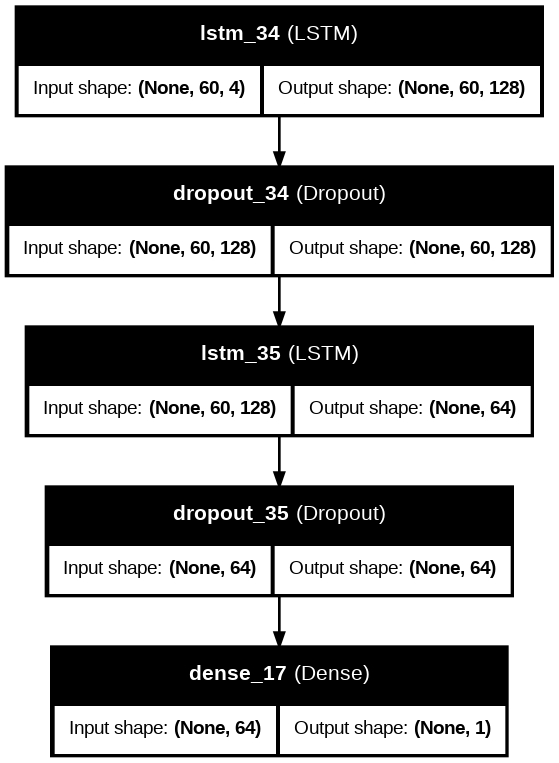


📌 Model Architecture for MSFT:


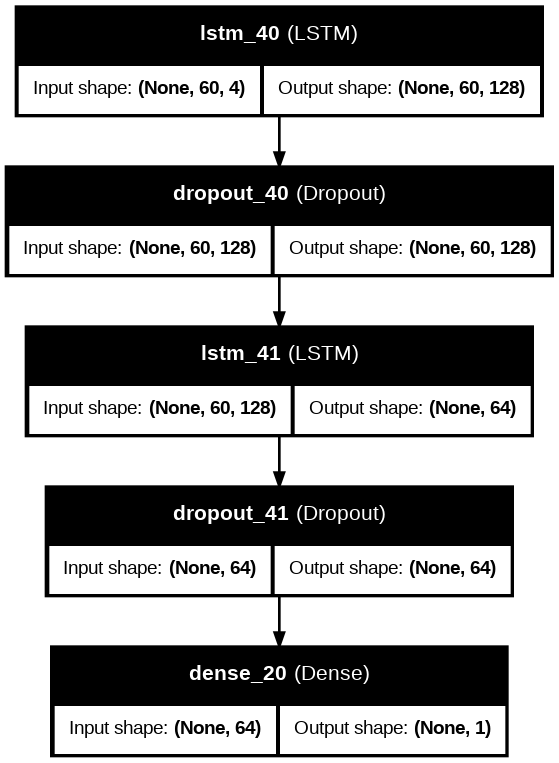


📌 Model Architecture for AMZN:


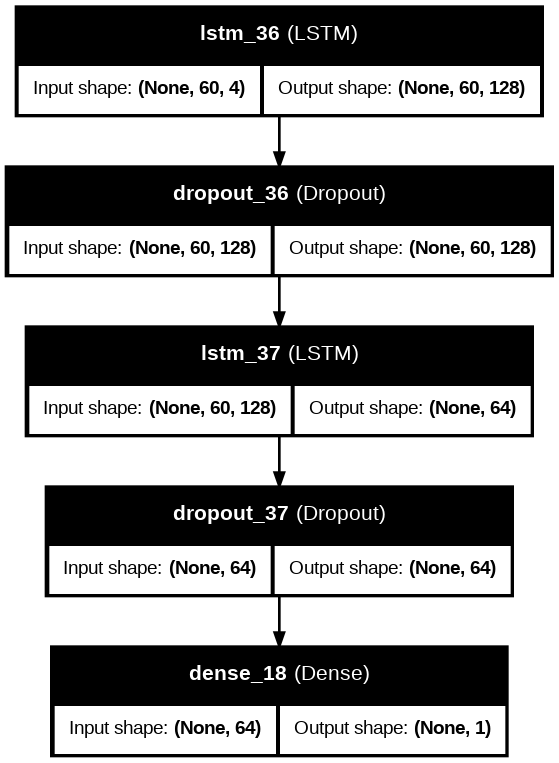


📌 Model Architecture for GOOGL:


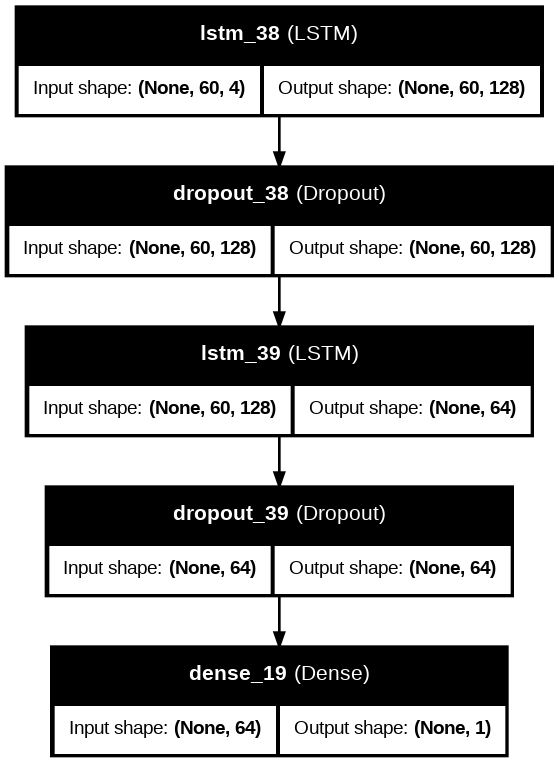

In [ ]:
from IPython.display import Image, display
import os

for company in companies:
    print(f"\n📌 Model Architecture for {company}:")
    img_path = f"architecture/{company}_model_architecture.png"  # match saved path

    if os.path.exists(img_path):
        display(Image(filename=img_path))
    else:
        print(f"⚠️ Architecture image not found: {img_path}")


📊 Visualizations for AAPL:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


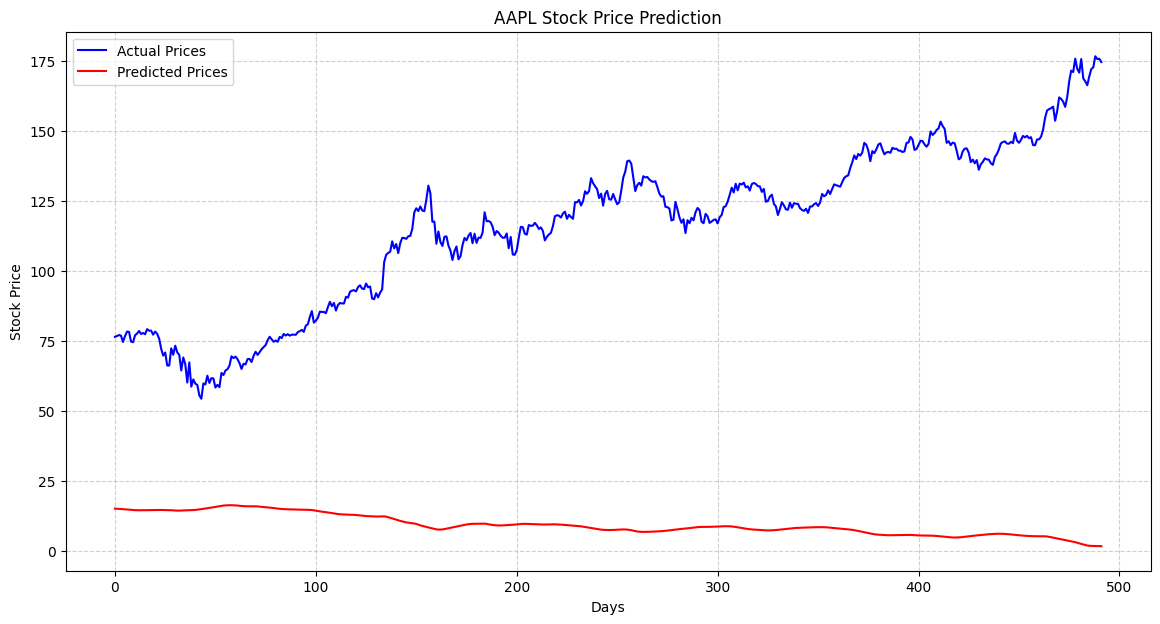

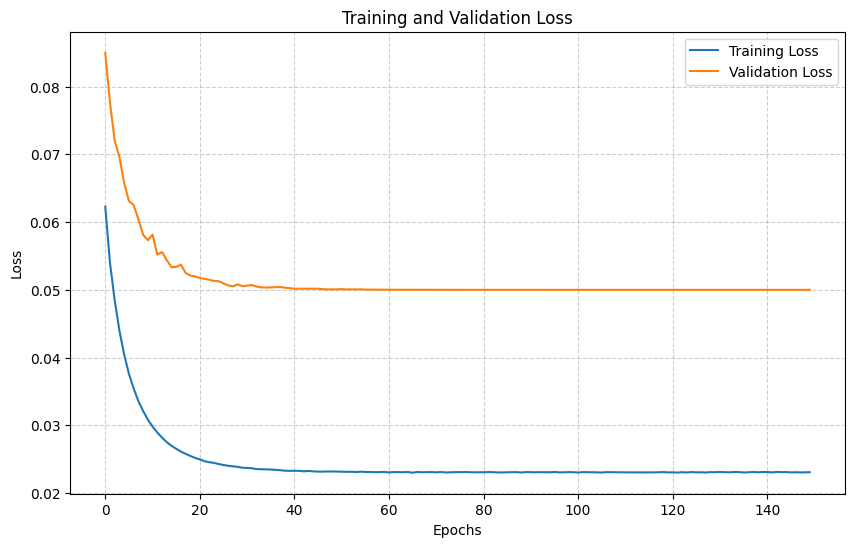


📊 Visualizations for MSFT:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


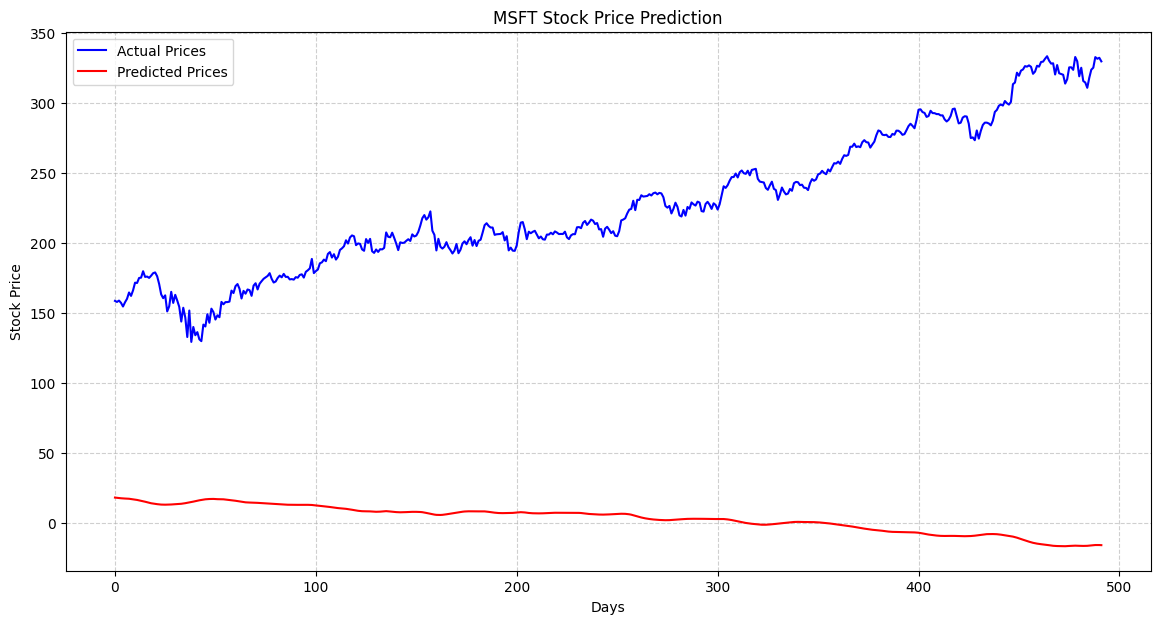

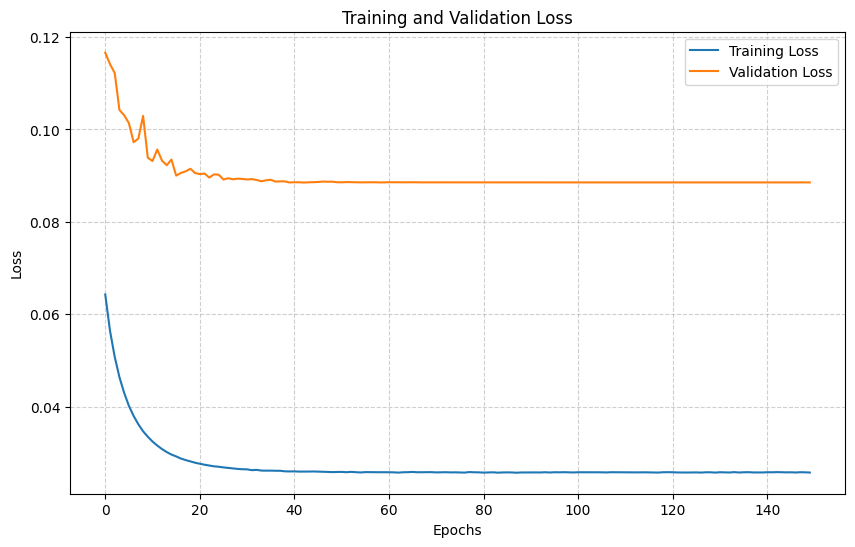


📊 Visualizations for AMZN:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


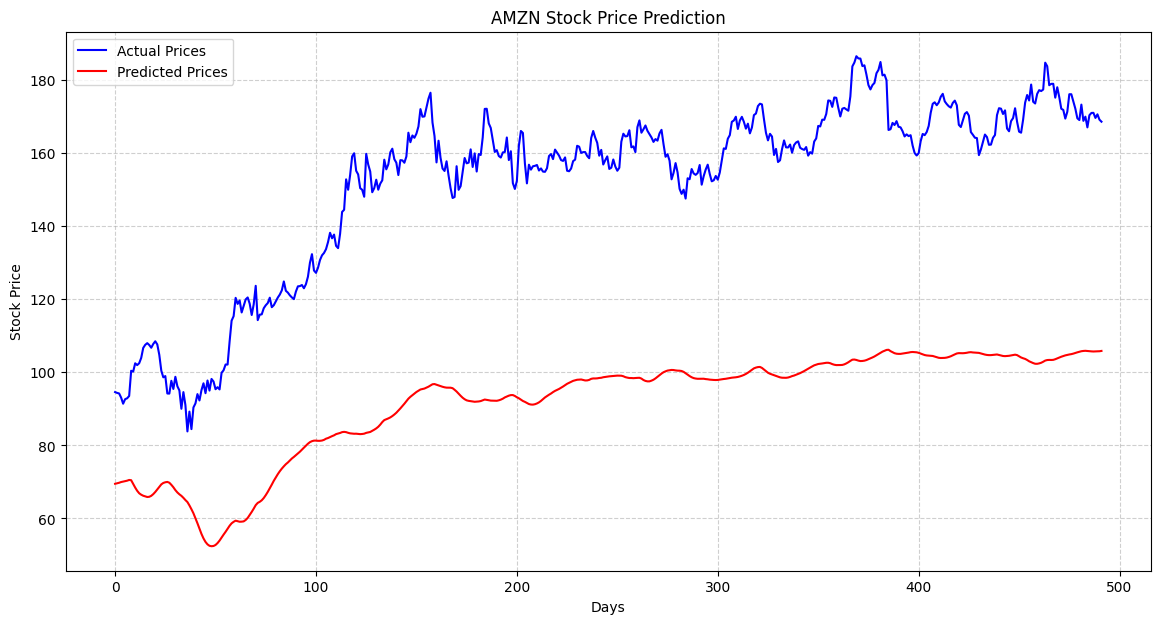

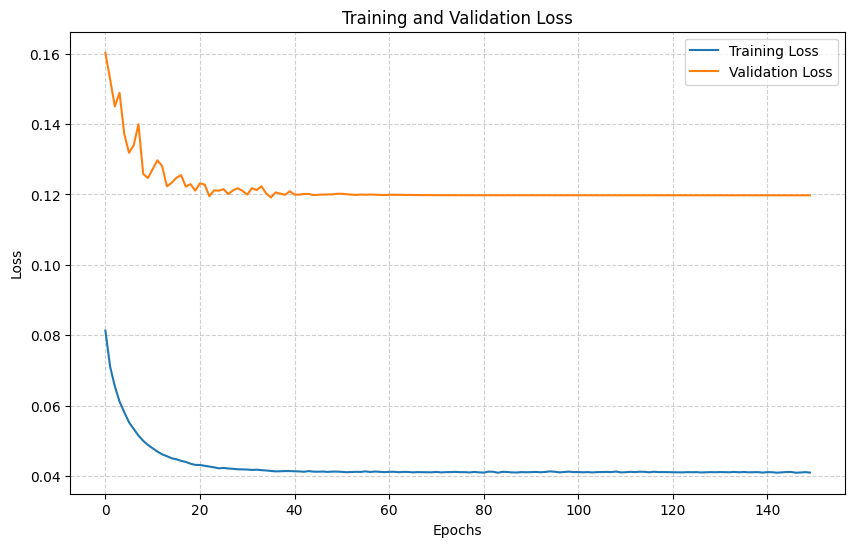


📊 Visualizations for GOOGL:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


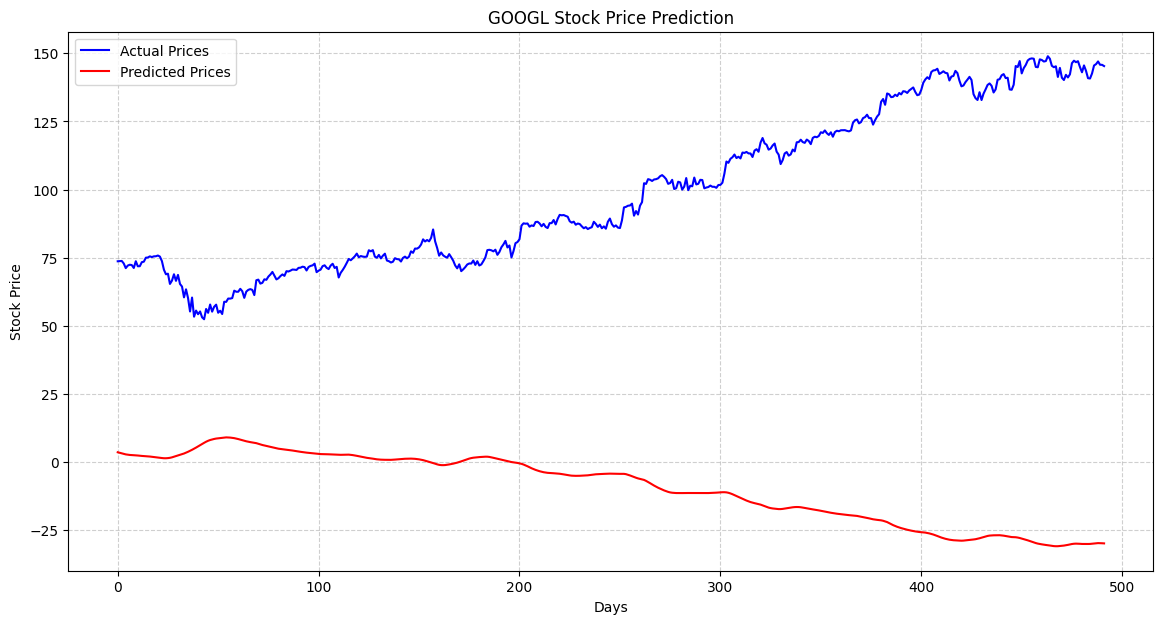

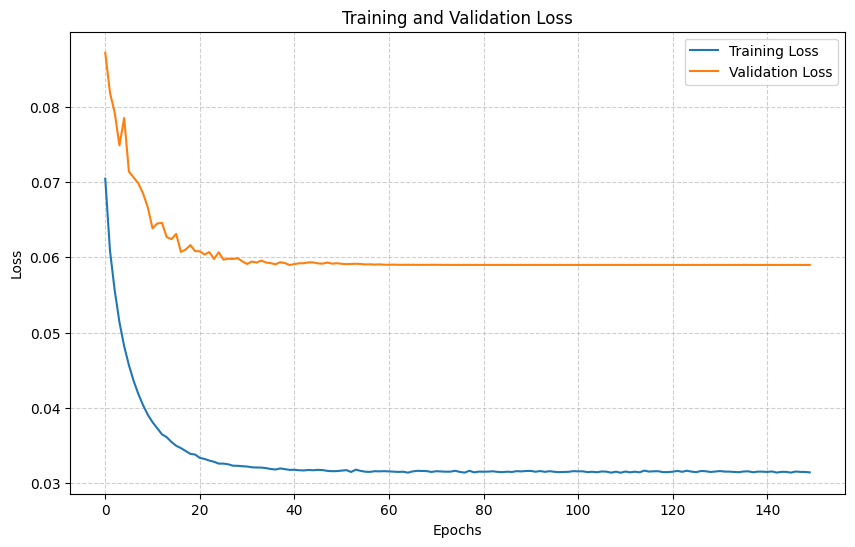

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib, os
from tensorflow.keras.models import load_model

# Config (must match training)
TIME_STEPS = 60

# Helper to recreate sequences
def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

for company in companies:
    print(f"\n📊 Visualizations for {company}:")

    # ---------- Load data ----------
    company_df = stock_data[stock_data['Company'] == company].sort_values('Date')
    X_raw = company_df[['Open', 'High', 'Low', 'Volume']].values.astype(float)
    y_raw = company_df[['Close']].values.astype(float)

    # Load scalers
    target_scaler = joblib.load(f"scalers/{company}_target_scaler.pkl")
    feature_scaler = joblib.load(f"scalers/{company}_feature_scaler.pkl")

    # Scale features & target
    X_scaled = feature_scaler.transform(X_raw)
    y_scaled = target_scaler.transform(y_raw)

    # Create sequences
    X_seq, y_seq = create_sequences(X_scaled, y_scaled)

    # Test split (same as before: last 20%)
    split_idx = int(len(X_seq) * 0.8)
    X_test, y_test = X_seq[split_idx:], y_seq[split_idx:]

    # ---------- Load model ----------
    model = load_model(f"models/LSTM_{company}.keras", compile=False)

    # ---------- Predictions ----------
    predictions = model.predict(X_test)
    predictions_inverse = target_scaler.inverse_transform(predictions)
    y_test_inverse = target_scaler.inverse_transform(y_test)

    # ---------- Plot 1: Actual vs Predicted ----------
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label='Actual Prices', color='blue')
    plt.plot(predictions_inverse, label='Predicted Prices', color='red')
    plt.title(f"{company} Stock Price Prediction")
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # ---------- Plot 2: Training vs Validation Loss ----------
    history_path = f"history/{company}_history.npy"
    if os.path.exists(history_path):
        history_data = np.load(history_path, allow_pickle=True).item()

        plt.figure(figsize=(10, 6))
        plt.plot(history_data['loss'], label='Training Loss')
        plt.plot(history_data['val_loss'], label='Validation Loss')
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print(f"⚠️ No history file found for {company}")

In [ ]:
import pandas as pd

# Load saved metrics file
metrics_df = pd.read_csv("metrics/train_metrics.csv")

# Print metrics for each company
for _, row in metrics_df.iterrows():
    print(f"\n📊 Performance Metrics for {row['Company']}:\n")
    print(f"MAPE : {row['MAPE']:.4f}")
    print(f"MSE  : {row['MSE']:.4f}")
    print(f"MAE  : {row['MAE']:.4f}")
    print(f"RMSE : {row['RMSE']:.4f}")
    print("-" * 40)


📊 Performance Metrics for AAPL:

MAPE : 75.1152
MSE  : 8788.7023
MAE  : 89.2645
RMSE : 93.7481
----------------------------------------

📊 Performance Metrics for AMZN:

MAPE : 75.2682
MSE  : 13982.8782
MAE  : 115.6298
RMSE : 118.2492
----------------------------------------

📊 Performance Metrics for GOOGL:

MAPE : 61.5011
MSE  : 4928.5299
MAE  : 64.0158
RMSE : 70.2035
----------------------------------------

📊 Performance Metrics for MSFT:

MAPE : 76.6477
MSE  : 33783.1701
MAE  : 176.8301
RMSE : 183.8020
----------------------------------------


# **Forecasting**

In [ ]:
import pandas as pd
import yfinance as yf

# Companies we want
companies = ["AAPL", "MSFT", "AMZN", "GOOGL"]

# Generate trading days for 2022 (NYSE calendar via yfinance)
# This ensures weekends and exchange holidays are excluded
trading_days = yf.download("AAPL", start="2022-01-01", end="2023-01-01").index

# Create forecast_data DataFrame
forecast_data = pd.DataFrame({
    "Date": list(trading_days) * len(companies),
    "Company": [comp for comp in companies for _ in range(len(trading_days))]
})

# Save to CSV
forecast_data.to_csv("forecast_data.csv", index=False)

print(f"✅ forecast_data.csv created with {len(forecast_data)} rows")

[*********************100%***********************]  1 of 1 completed

✅ forecast_data.csv created with 1004 rows
        Date Company
0 2022-01-03    AAPL
1 2022-01-04    AAPL
2 2022-01-05    AAPL
3 2022-01-06    AAPL
4 2022-01-07    AAPL


In [ ]:
forecast_data

,Date,Company
0,2022-01-03,AAPL
1,2022-01-04,AAPL
2,2022-01-05,AAPL
3,2022-01-06,AAPL
4,2022-01-07,AAPL
...,...,...
999,2022-12-23,GOOGL
1000,2022-12-27,GOOGL
1001,2022-12-28,GOOGL
1002,2022-12-29,GOOGL


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# ----------------------
# Config
# ----------------------
TIME_STEPS = 60
FEATURES = ['Open', 'High', 'Low', 'Volume']
companies = stock_data['Company'].unique()

# ----------------------
# Load Data
# ----------------------
forecast_dates = pd.read_csv("forecast_data.csv")  # Contains Date, Company for 2022 trading days
forecast_dates['Date'] = pd.to_datetime(forecast_dates['Date'])

historical_data = pd.read_csv("stocks_data.csv")  # Historical data for all companies
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# ----------------------
# Forecasting
# ----------------------
results = []

for company in companies:
    print(f"\n🔮 Forecasting for {company}...")

    company_forecast_rows = forecast_dates[forecast_dates['Company'] == company]
    company_hist = historical_data[historical_data['Company'] == company].copy()

    # Sort and filter
    company_hist = company_hist.dropna(subset=FEATURES + ['Close']).sort_values('Date')
    if len(company_hist) < TIME_STEPS:
        print(f"⚠️ Skipping {company}: insufficient historical data.")
        continue

    # ----------------------
    # Load saved scalers from training
    # ----------------------
    feature_scaler_path = f"scalers/{company}_feature_scaler.pkl"
    target_scaler_path = f"scalers/{company}_target_scaler.pkl"

    if not os.path.exists(feature_scaler_path) or not os.path.exists(target_scaler_path):
        print(f"⚠️ Missing scaler(s) for {company} -> skipping forecast")
        continue

    feature_scaler = joblib.load(feature_scaler_path)
    target_scaler = joblib.load(target_scaler_path)

    # ----------------------
    # Load trained LSTM model (.keras format)
    # ----------------------
    model_path = f"models/LSTM_{company}.keras"
    if not os.path.exists(model_path):
        print(f"⚠️ Model missing for {company} -> skipping forecast")
        continue

    model = load_model(model_path, compile=False)

    # ----------------------
    # Prepare last TIME_STEPS historical features
    # ----------------------
    last_hist = company_hist.tail(TIME_STEPS)
    features_scaled = feature_scaler.transform(last_hist[FEATURES].values)
    X_test = np.array([features_scaled])  # shape: (1, TIME_STEPS, FEATURES)

    # ----------------------
    # Step-by-step autoregressive forecasting
    # ----------------------
    forecast_steps = len(company_forecast_rows)
    preds_scaled = []

    for _ in range(forecast_steps):
        pred_scaled = model.predict(X_test, verbose=0)[0]
        preds_scaled.append(pred_scaled[0])

        # Slide window: drop first row, append new prediction
        new_row = np.array([pred_scaled[0]] * len(FEATURES)).reshape(1, len(FEATURES))
        X_test = np.concatenate((X_test[0][1:], new_row), axis=0)
        X_test = np.array([X_test])

    # ----------------------
    # Inverse scale predictions
    # ----------------------
    preds_scaled = np.array(preds_scaled).reshape(-1, 1)
    preds_inv = target_scaler.inverse_transform(preds_scaled).flatten()

    # ----------------------
    # Save results for this company
    # ----------------------
    df_out = pd.DataFrame({
        'Date': company_forecast_rows['Date'].values[:len(preds_inv)],
        'Company': company,
        'Forecasted Close': preds_inv
    })
    results.append(df_out)

# ----------------------
# Save all forecasts
# ----------------------
if results:
    forecasted_results = pd.concat(results, ignore_index=True)
    os.makedirs("outputs", exist_ok=True)
    forecasted_results.to_csv("outputs/forecasted_results.csv", index=False)
    print(f"\n✅ Saved outputs/forecasted_results.csv with {len(forecasted_results)} rows")
else:
    print("\n⚠️ No forecasts generated.")


🔮 Forecasting for AAPL...

🔮 Forecasting for AMZN...

🔮 Forecasting for GOOGL...

🔮 Forecasting for MSFT...

✅ Saved outputs/forecasted_results.csv with 1004 rows


#**Portfolio Optimization**

In [ ]:
# =========================
# Portfolio Optimization (EQ, MC Max-Sharpe, MVO) using 2022 Forecasts
# Uses outputs/forecasted_results.csv produced by your forecasting step
# =========================

import os
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# ----------------------
# Config
# ----------------------
RISK_FREE = 0.0                  # paper uses Sharpe = return / risk (rf=0)
FORECAST_CSV = "outputs/forecasted_results.csv"   # path used earlier
N_SIMS = 50_000                  # Monte Carlo trials (increase if needed)
SEED = 42                        # for reproducibility; set None to disable
ANNUALIZATION = 252              # NYSE trading days

if SEED is not None:
    np.random.seed(SEED)

# ----------------------
# Load & prepare forecasted prices for 2022
# ----------------------
if not os.path.exists(FORECAST_CSV):
    raise FileNotFoundError(f"Missing {FORECAST_CSV}. Run the forecasting step first.")

f = pd.read_csv(FORECAST_CSV)  # Expect columns: Date, Company, Forecasted Close
f["Date"] = pd.to_datetime(f["Date"])

# Keep only valid rows and pivot to wide
f = f.dropna(subset=["Company", "Forecasted Close"])
wide_prices = (
    f.pivot(index="Date", columns="Company", values="Forecasted Close")
     .sort_index()
)

# Require full panel (drop dates with any missing ticker)
wide_prices = wide_prices.dropna(how="any")

tickers = wide_prices.columns.tolist()
n = len(tickers)
if n == 0:
    raise ValueError("No tickers found after pivot/dropna. Check forecast file.")

# ----------------------
# Compute forecasted daily returns & annualized moments (as per paper)
# ----------------------
daily_rets = wide_prices.pct_change().dropna(how="any")

# Annualized expected returns (μ) and covariance (Σ)
mu_annual = daily_rets.mean() * ANNUALIZATION          # vector μ
cov_annual = daily_rets.cov() * ANNUALIZATION          # matrix Σ

# ----------------------
# Helpers
# ----------------------
def portfolio_stats(weights, mu=mu_annual, cov=cov_annual, rf=RISK_FREE):
    w = np.asarray(weights, dtype=float)
    ret = float(np.dot(w, mu))
    vol = float(np.sqrt(np.dot(w.T, cov @ w)))
    sharpe = (ret - rf) / vol if vol > 0 else -np.inf
    return ret, vol, sharpe

def bounds_long_only(n_assets):
    return tuple((0.0, 1.0) for _ in range(n_assets))

def weight_constraint_eq1(n_assets):
    # weights sum to 1
    return {"type": "eq", "fun": lambda w: np.sum(w) - 1.0}

def random_long_only_weights(n_assets):
    x = np.random.rand(n_assets)
    return x / x.sum()

# ----------------------
# Strategy 1: Equal-Weighted (EQ)
# ----------------------
w_eq = np.ones(n) / n
eq_ret, eq_vol, eq_sharpe = portfolio_stats(w_eq, mu_annual, cov_annual, RISK_FREE)

# ----------------------
# Strategy 2: Monte Carlo (MC) — Max Sharpe (long-only)
# ----------------------
best_sharpe, best_w = -np.inf, None
for _ in range(N_SIMS):
    w = random_long_only_weights(n)
    r, v, s = portfolio_stats(w, mu_annual, cov_annual, RISK_FREE)
    if s > best_sharpe:
        best_sharpe, best_w = s, w

mc_w = best_w
mc_ret, mc_vol, mc_sharpe = portfolio_stats(mc_w, mu_annual, cov_annual, RISK_FREE)

# ----------------------
# Strategy 3: Mean-Variance Optimization (MVO)
# Long-only, sum(weights)=1, minimize variance s.t. expected return >= target_return.
# To align with the paper & keep consistency, set target_return to the MC portfolio's expected return.
# ----------------------
target_return = mc_ret

def objective_variance(w, cov=cov_annual):
    return float(w.T @ cov @ w)

constraints = [
    weight_constraint_eq1(n),
    {"type": "ineq", "fun": lambda w, mu=mu_annual, t=target_return: float(np.dot(w, mu)) - float(t)}
]

res = minimize(
    objective_variance,
    x0=np.ones(n)/n,
    method="SLSQP",
    bounds=bounds_long_only(n),
    constraints=constraints,
    options={"maxiter": 10000, "ftol": 1e-12}
)

# Fallback to pure min-variance if the target is infeasible
if not res.success:
    res = minimize(
        objective_variance,
        x0=np.ones(n)/n,
        method="SLSQP",
        bounds=bounds_long_only(n),
        constraints=[weight_constraint_eq1(n)],
        options={"maxiter": 10000, "ftol": 1e-12}
    )

mvo_w = res.x
mvo_ret, mvo_vol, mvo_sharpe = portfolio_stats(mvo_w, mu_annual, cov_annual, RISK_FREE)

# ----------------------
# Summaries
# ----------------------
weights_df = pd.DataFrame(
    {
        "EQ": w_eq,
        "MC (Max Sharpe)": mc_w,
        "MVO": mvo_w
    },
    index=tickers
).round(6)

metrics_df = pd.DataFrame(
    {
        "Return (ann.)": [eq_ret, mc_ret, mvo_ret],
        "Risk (ann. stdev)": [eq_vol, mc_vol, mvo_vol],
        "Sharpe": [eq_sharpe, mc_sharpe, mvo_sharpe],
    },
    index=["EQ", "MC (Max Sharpe)", "MVO"]
).round(6)

print("=== Weights ===")
print(weights_df)
print("\n=== Metrics (annualized from forecasted 2022 path) ===")
print(metrics_df)

# Save results
os.makedirs("outputs", exist_ok=True)
weights_df.to_csv("outputs/optimized_weights.csv")
metrics_df.to_csv("outputs/optimized_metrics.csv")
print("\n✅ Saved: outputs/optimized_weights.csv and outputs/optimized_metrics.csv")

=== Weights ===
         EQ  MC (Max Sharpe)       MVO
AAPL   0.25         0.840955  0.845933
AMZN   0.25         0.005254  0.006043
GOOGL  0.25         0.076979  0.064934
MSFT   0.25         0.076812  0.083090

=== Metrics (annualized from forecasted 2022 path) ===
                 Return (ann.)  Risk (ann. stdev)    Sharpe
EQ                    0.766271           1.121319  0.683365
MC (Max Sharpe)       2.732125           0.900987  3.032370
MVO                   2.732125           0.899901  3.036029

✅ Saved: outputs/optimized_weights.csv and outputs/optimized_metrics.csv
